In [2]:
#IMPORT
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("./csv_files/lr-Real-estate.csv")
data

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [4]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [5]:
#condition=data.duplicated()
data[data.duplicated()]

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area


In [6]:
#check if dataframe has null values
#can be checked from above information
data.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [7]:
#check the value of duplicated values
data.duplicated().sum()

0

In [15]:
data.corr()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
No,1.000000,-0.048658,-0.032808,-0.013573,-0.012699,-0.010110,-0.011059,-0.028587
X1 transaction date,-0.048658,1.000000,0.017549,0.060880,0.009635,0.035058,-0.041082,0.087491
X2 house age,-0.032808,0.017549,1.000000,0.025622,0.049593,0.054420,-0.048520,-0.210567
X3 distance to the nearest MRT station,-0.013573,0.060880,0.025622,1.000000,-0.602519,-0.591067,-0.806317,-0.673613
X4 number of convenience stores,-0.012699,0.009635,0.049593,-0.602519,1.000000,0.444143,0.449099,0.571005
X5 latitude,-0.010110,0.035058,0.054420,-0.591067,0.444143,1.000000,0.412924,0.546307
X6 longitude,-0.011059,-0.041082,-0.048520,-0.806317,0.449099,0.412924,1.000000,0.523287
Y house price of unit area,-0.028587,0.087491,-0.210567,-0.673613,0.571005,0.546307,0.523287,1.000000


<Axes: >

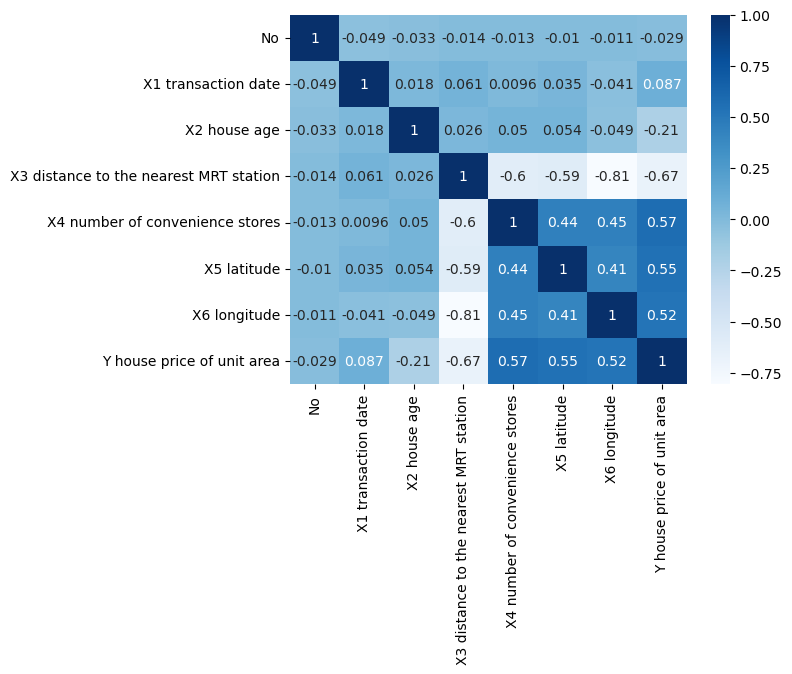

In [17]:
#annot= to write value into the cell
#camp= 
sns.heatmap(data.corr(),annot=True , cmap="Blues")

In [18]:
#Thus dropping other independent features
data.drop(['No','X1 transaction date'], axis=1, inplace=True)
data

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...
409,13.7,4082.01500,0,24.94155,121.50381,15.4
410,5.6,90.45606,9,24.97433,121.54310,50.0
411,18.8,390.96960,7,24.97923,121.53986,40.6
412,8.1,104.81010,5,24.96674,121.54067,52.5


In [21]:
#splitting the dependent and independent features.
X = data.drop(['Y house price of unit area'], axis=1)
y = data['Y house price of unit area']
print(X)

     X2 house age  X3 distance to the nearest MRT station  \
0            32.0                                84.87882   
1            19.5                               306.59470   
2            13.3                               561.98450   
3            13.3                               561.98450   
4             5.0                               390.56840   
..            ...                                     ...   
409          13.7                              4082.01500   
410           5.6                                90.45606   
411          18.8                               390.96960   
412           8.1                               104.81010   
413           6.5                                90.45606   

     X4 number of convenience stores  X5 latitude  X6 longitude  
0                                 10     24.98298     121.54024  
1                                  9     24.98034     121.53951  
2                                  5     24.98746     121.54391  
3  

In [22]:
print(y)

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64


In [ ]:
#splitting data into train and test sets for training
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42        #test size=20%=0.2 (0-1).Random state=42(jati click garera run gareni x train,test stays in same order.order depends on value.)
)

In [ ]:
#check the shape of the splited sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
lr_model = LinearRegression()

In [ ]:
#Training the model
lr_model = LinearRegression()

In [ ]:
lr_model.fit(X_train, y_train) #model train

In [ ]:
pd.DataFrame(lr_model.coef_, X.columns, columns=['coefficient'])

PREDICTION

In [ ]:
y_pred = lr_model.predict(X_test) #predict y with reference to x

In [ ]:
#check the prediction with respect to ground truth
com = pd.DataFrame({'y_test':y_test, 'y_pred':y_pred}).reset_index()
com

In [ ]:
len_test = len(y_pred) #no of elements in y_pred
default_arr = np.array(range(len_test)) #np.array(range(83)) #np.array creates array of numpy from range 0-82
default_arr

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(default_arr, y_test, marker='o', label="Ground Truth")
plt.scatter(default_arr, y_pred, marker='x', label="Prediction")
plt.legend()
plt.grid()

In [ ]:
#check accuracy of the model on test_set
lr_model.score(X_test, y_test)

EVALUATING THE MODEL

In [ ]:
from sklearn import metrics
import numpy as np

In [ ]:
MSE = metrics.mean_squared_error(y_test, y_pred)
RMSE =np.sqrt(MSE)

In [ ]:
MSE

In [ ]:
RMSE

CLASSIFICATION 

1. Used to classify whether the features with oarticular value belongs to distinct class.

LOGISTIC REGRESSION